# Deep Learning - Recurrent Neural Network

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [34]:
data_mastercard = pd.read_csv("Mastercard_stock.csv", index_col = "Date") # Changed index as Date column in this data set
data_mastercard.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0
2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0


In [35]:
data_mastercard.tail() # last rows

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-10-05,347.121403,348.130138,342.497241,342.776886,4724100,0.00,0.0
2021-10-06,339.580960,348.439763,338.682072,348.250000,3712000,0.00,0.0
2021-10-07,349.000000,357.899994,349.000000,353.910004,3209200,0.44,0.0
2021-10-08,356.000000,360.369995,354.209991,354.959991,2336700,0.00,0.0
2021-10-11,353.950012,354.880005,346.899994,347.149994,2766800,0.00,0.0


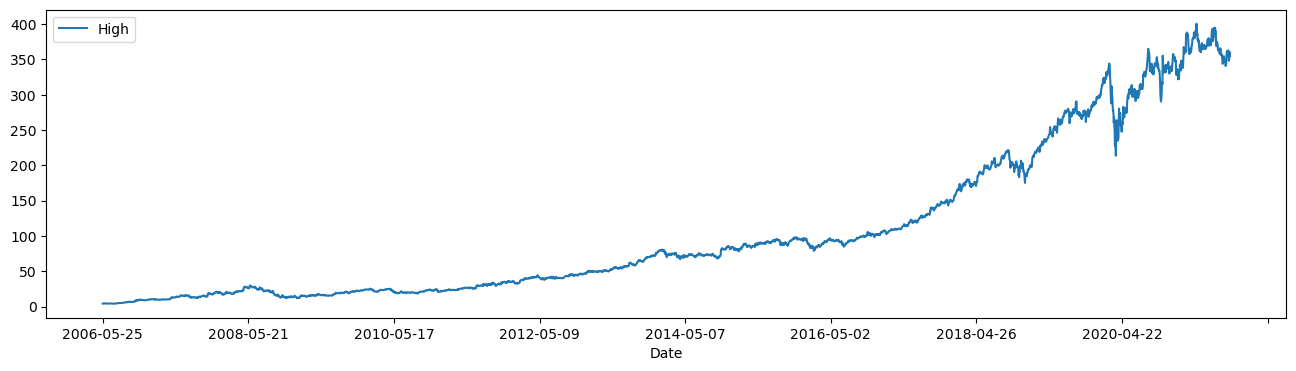

In [36]:
data_mastercard.loc[:, "High"].plot(figsize = (16, 4), legend = True)
plt.show()

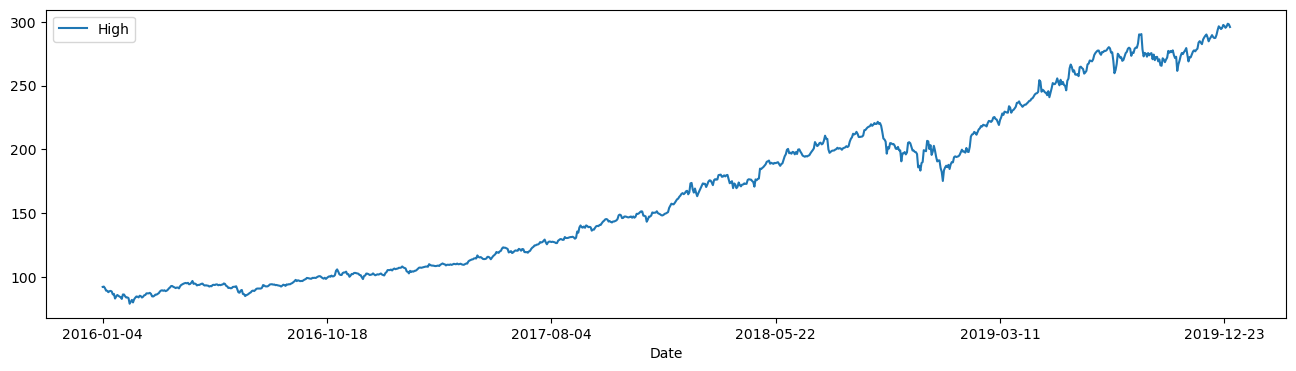

In [37]:
data_mastercard.loc["2016" : "2020", "High"].plot(figsize = (16, 4), legend = True)
plt.show()

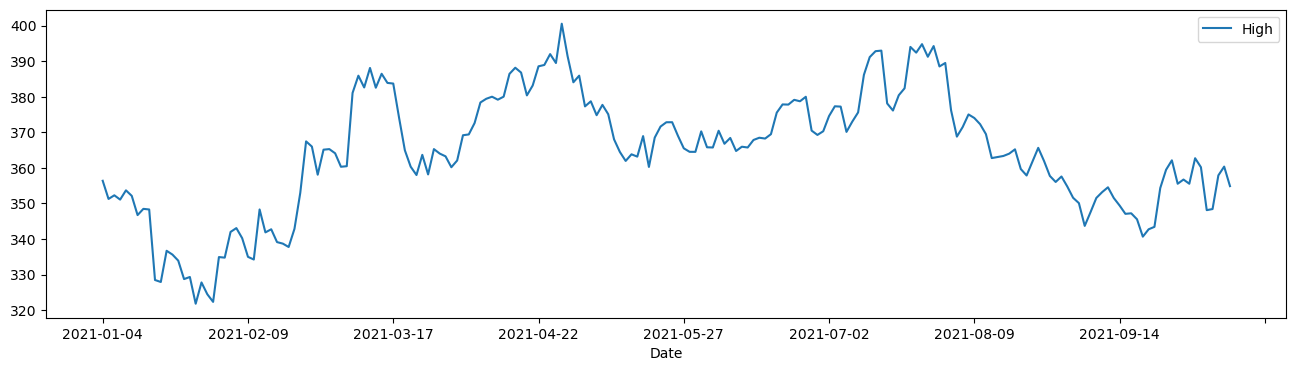

In [38]:
data_mastercard.loc["2021" : , "High"].plot(figsize = (16, 4), legend = True)
plt.show()

In [39]:
train = data_mastercard.loc["2016": "2020", "High"].values
test = data_mastercard.loc["2021": , "High"].values

In [40]:
scaler_obj = MinMaxScaler()
training_set = train.reshape(-1, 1)  # (-1, 1) = (1006, 1)
training_set_scaled = scaler_obj.fit_transform(training_set)

In [41]:
training_set_scaled

array([[0.06010642],
       [0.06116047],
       [0.05566717],
       ...,
       [1.        ],
       [0.99783559],
       [0.98827584]])

In [42]:
training_set_scaled.shape

(1006, 1)

We need a table that contain first values (60, index 0-59) as independent values(x1, x2, x3, ...) and next value(61) as dependent value(y), Next, ignore 1st value(0 index) get next 60 values(index 1-60) and 62 value(index 61) as y, .... so on...

In [66]:
n_steps = 60

x = []
y = []

for i in range(len(training_set_scaled)):
    end_index = i + n_steps
    if end_index > len(training_set_scaled) - 1:
        break
    seq_x, seq_y = training_set_scaled[i:end_index], training_set_scaled[end_index]
    x.append(seq_x)
    y.append(seq_y)
    
x_train = np.array(x)
y_train = np.array(y)

In [44]:
x_train.shape

(946, 60, 1)

In [45]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, activation="tanh", input_shape= (n_steps, 1)))
model_lstm.add(Dense(units=1))

C:\Users\Lapmart\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Let compile model

In [46]:
model_lstm.compile(optimizer="RMSprop", loss="mse")
model_lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 125)                 │          63,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             126 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,626 (248.54 KB)

 Trainable params: 63,626 (248.54 KB)

 Non-trainable params: 0 (0.00 B)

## Let fit the model

In [47]:
model_lstm.fit(x_train, y_train, epochs=50)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0588
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0028
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0027
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0020
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0015
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 8.1880e-04
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0015
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 9.4927e-04
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 5.8085e-04
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0011
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0012
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 9.6481e-04
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 7.9724e-04
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 6.2900e-04
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/

In [68]:
dataset_total = data_mastercard.loc[:, "High"]
inputs = dataset_total[len(dataset_total) - len(test) - n_steps : ].values # 1006 - test_size - 60, now from before 60 from test
# 0...........start(60)---test---1006 apassata hitn aga idn
inputs = inputs.reshape(-1, 1)

# min max Scaling
inputs = scaler_obj.transform(inputs)

n_steps = 60

x1 = []
y1 = []

for i in range(len(inputs)):
    end_index = i + n_steps
    if end_index > len(inputs) - 1:
        break
    seq_x1, seq_y1 = inputs[i:end_index], inputs[end_index]
    x1.append(seq_x1)
    y1.append(seq_y1)
    
x_test = np.array(x1)
y_test = np.array(y1)

## Prediction

In [69]:
predicted_stock_price = model_lstm.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


## Inverse transform

In [70]:
predicted_stock_price = scaler_obj.inverse_transform(predicted_stock_price)

## Let plot the values

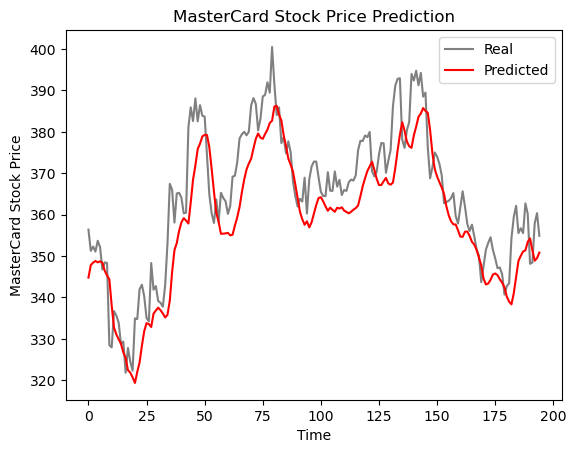

In [73]:
plt.plot(data_mastercard.loc["2021": , "High"].values, color = "gray", label = "Real")
plt.plot(predicted_stock_price, color="red", label= "Predicted")
plt.title("MasterCard Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("MasterCard Stock Price")
plt.legend()
plt.show()

In [74]:
np.sqrt(mean_squared_error(data_mastercard.loc["2021":, "High"].values, predicted_stock_price))

8.984305831261919